In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data extracted from the experiment shown in Fig 2C

In [2]:
# import data
filename = 'FigS4_data.xlsx'
xl = pd.ExcelFile(filename)

# extract Fp data for each sample
fp_ip = xl.parse('figS4', index_col = 0, header = 0).reset_index()

# transform to long format for downstream process
ip_long = pd.melt(fp_ip, id_vars='index', value_name='Fp')
ip_long.rename(columns = {'variable':'Replicate', 'index':'SampleID'}, inplace = True)

# annotate chemical condition types
atcs = np.tile(np.array(['No ATc', '100 ng/mL ATc']),8)
kans = np.tile(np.repeat(np.array(['0 kan', '50 kan']),2),4)
lins = np.repeat(np.array(['0 lin']),16)

ip_long.insert(1, 'Lin', lins)
ip_long.insert(1, 'Kan', kans)
ip_long.insert(1, 'ATc', atcs)

ip_long

,SampleID,ATc,Kan,Lin,Replicate,Fp
0,Sample_01,No ATc,0 kan,0 lin,rep1,0.520388
1,Sample_06,100 ng/mL ATc,0 kan,0 lin,rep1,0.003457
2,Sample_13,No ATc,50 kan,0 lin,rep1,0.828169
3,Sample_18,100 ng/mL ATc,50 kan,0 lin,rep1,0.275556
4,Sample_01,No ATc,0 kan,0 lin,rep2,0.621359
5,Sample_06,100 ng/mL ATc,0 kan,0 lin,rep2,0.003842
6,Sample_13,No ATc,50 kan,0 lin,rep2,0.602817
7,Sample_18,100 ng/mL ATc,50 kan,0 lin,rep2,0.204444
8,Sample_01,No ATc,0 kan,0 lin,rep3,0.493204
9,Sample_06,100 ng/mL ATc,0 kan,0 lin,rep3,0.004130


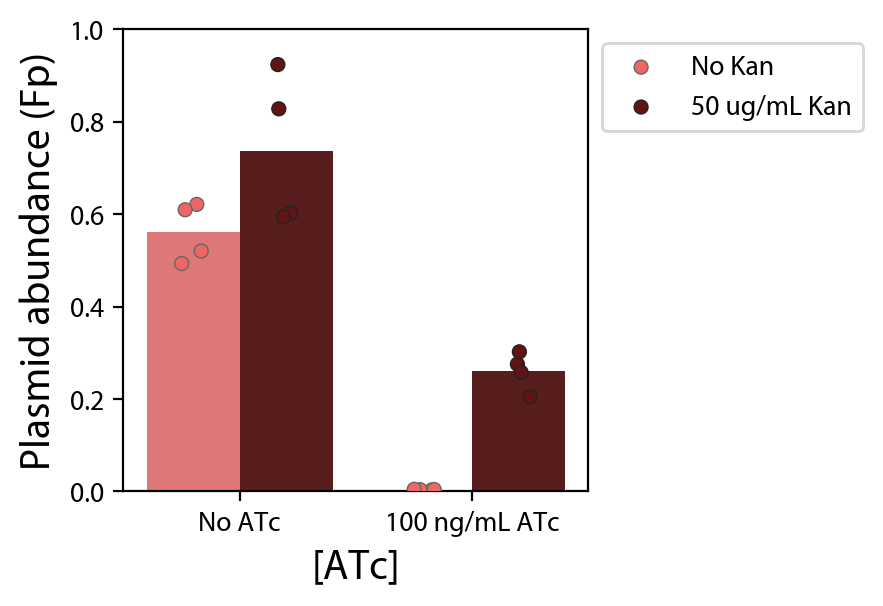

In [3]:
# plot 

fig, axes = plt.subplots(1,1, figsize = (3,3), sharey = True, sharex = True, dpi=200)
plt.rcParams['font.sans-serif'] = "Myriad Pro"

df = ip_long
# 
bb  = sns.barplot(data = df, x = 'ATc', y = 'Fp', errorbar = None, hue = 'Kan', ax = axes, 
                 palette=['#EF6666', '#621313'])
sns.stripplot(data = df,  x = 'ATc', y = 'Fp', hue = 'Kan', palette=['#EF6666', '#621313'],
              edgecolor = 'gray', linewidth = 0.5, ax = bb, dodge = True)

handles, labels = axes.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.legend(labels = ['No Kan', '50 ug/mL Kan'])
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))

axes.set_xlabel('[ATc]', fontsize = 15)
axes.set_ylabel('Plasmid abundance (Fp)', fontsize = 15)
axes.set_ylim([0,1])
plt.show()